In [1]:
# Importing Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

ds = pd.read_csv("cleaned_diabetic_data.csv")
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]                # removing unnamed column
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [3]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Splitting dataset into Independent and Dependent variable

X = ds[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = ds[['Outcome']]

In [5]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [6]:
# Splitting the dataset into the Training set and Testing set(80% Train and 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [7]:
# applying the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predict for myinput

myinput = pd.DataFrame(sc.transform([[0, 89, 66, 23, 94, 28, 0.670, 35]]), columns =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
classifier.predict(myinput)


# For above myinput data the logistic regression predicts 0(person is not diabetic)

array([0], dtype=int64)

In [9]:
# Cheaking Accuracy of logistic regresssion model

from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

Accuracy of the logistic regression model: 87.01%


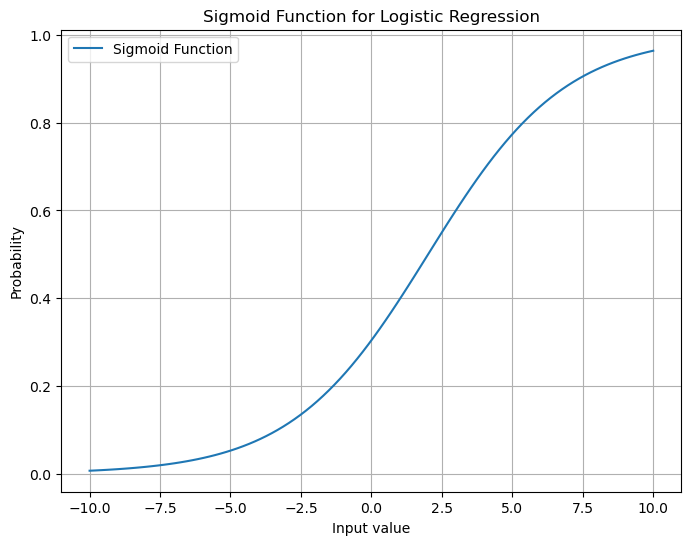

In [22]:
# Plotting Sigmoid function

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming your classifier is a logistic regression model
# We need the coefficients (weights) and the intercept from the model
weights = classifier.coef_[0]
intercept = classifier.intercept_[0]

# Generate a range of values (e.g., values from -10 to 10 for the linear combination of features)
X_range = np.linspace(-10, 10, 100)

# Calculate the sigmoid of each value
sigmoid = 1 / (1 + np.exp(-(weights[0] * X_range + intercept)))

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(X_range, sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Function for Logistic Regression')
plt.xlabel('Input value')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()